In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from mlxtend.plotting import plot_decision_regions , decision_regions 

# DATA Visualization and EDA

In [3]:
df = pd.read_csv("Avalache_data.csv")

In [7]:
df.head(3)

,Date/Time (PST),Temperature (deg F),Relative Humidity (%),"Total Snow Depth ("")","Intermittent/Shot Snow ("")"
0,25-06-2019 15:00,47.33,89.90,16.46,-7999.0
1,25-06-2019 14:00,53.80,69.82,10.02,-7999.0
2,25-06-2019 13:00,55.02,65.32,12.31,-7999.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4216 entries, 0 to 4215
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date/Time (PST)             4216 non-null   object 
 1   Temperature (deg F)         4216 non-null   float64
 2   Relative Humidity (%)       4216 non-null   float64
 3   Total Snow Depth (")        4216 non-null   float64
 4   Intermittent/Shot Snow (")  4216 non-null   float64
dtypes: float64(4), object(1)
memory usage: 164.8+ KB


In [9]:
df.describe()

,Temperature (deg F),Relative Humidity (%),"Total Snow Depth ("")","Intermittent/Shot Snow ("")"
count,4216.000000,4216.000000,4216.000000,4216.000000
mean,33.505245,81.600569,80.572843,-2095.653835
std,12.387051,19.137084,30.127579,3583.012850
min,3.482000,10.100000,1.696000,-7999.000000
25%,24.777500,71.257500,70.350000,-7999.000000
50%,32.870000,89.050000,89.900000,7.387000
75%,41.470000,96.100000,103.000000,35.260000
max,76.240000,100.000000,214.700000,514.600000


In [10]:
df.isnull().sum()

Date/Time (PST)               0
Temperature (deg F)           0
Relative Humidity (%)         0
Total Snow Depth (")          0
Intermittent/Shot Snow (")    0
dtype: int64

In [11]:
plt.figure(figsize=(12,8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

C:\Users\HP\AppData\Local\Temp\ipykernel_30176\874776529.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot=True , cmap='coolwarm')


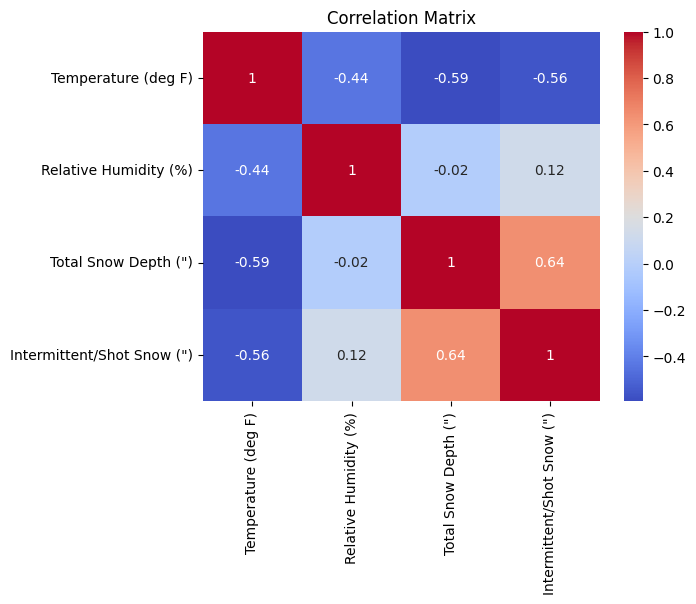

In [12]:
sns.heatmap(df.corr() , annot=True , cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

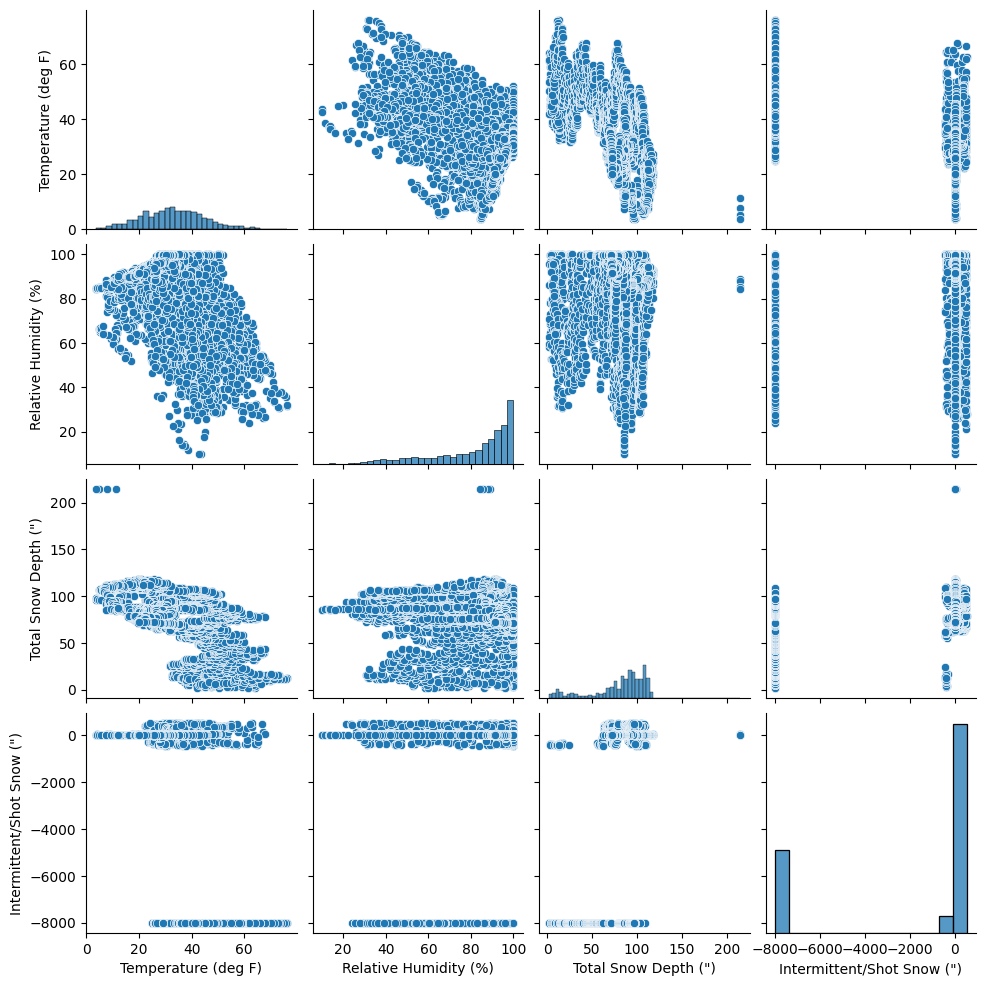

In [13]:
# Pairplot for numerical features
sns.pairplot(df)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler , LabelEncoder

In [15]:
new_df = df.dropna()

In [16]:
label_encoders = {}

for column in new_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le 

In [17]:
new_data_df = new_df['Date/Time (PST)']  = pd.to_datetime(new_df['Date/Time (PST)'] , errors='coerce')

In [18]:
new_df['Date'] = new_df['Date/Time (PST)'].dt.date
new_df['Time'] = new_df['Date/Time (PST)'].dt.time

# Extract the Additional Features

In [19]:
new_df['Year'] = new_df['Date/Time (PST)'].dt.year
new_df['Month'] = new_df['Date/Time (PST)'].dt.month
new_df['Day'] = new_df['Date/Time (PST)'].dt.day
new_df['Hour'] = new_df['Date/Time (PST)'].dt.hour
new_df['Minute'] = new_df['Date/Time (PST)'].dt.minute
new_df['Second'] = new_df['Date/Time (PST)'].dt.second

In [20]:
new_df.drop('Date/Time (PST)' , axis=1, inplace=True)

In [21]:
new_df.head(3)

,Temperature (deg F),Relative Humidity (%),"Total Snow Depth ("")","Intermittent/Shot Snow ("")",Date,Time,Year,Month,Day,Hour,Minute,Second
0,47.33,89.90,16.46,-7999.0,2019-06-25,15:00:00,2019,6,25,15,0,0
1,53.80,69.82,10.02,-7999.0,2019-06-25,14:00:00,2019,6,25,14,0,0
2,55.02,65.32,12.31,-7999.0,2019-06-25,13:00:00,2019,6,25,13,0,0


In [22]:
new_df.head(3)

,Temperature (deg F),Relative Humidity (%),"Total Snow Depth ("")","Intermittent/Shot Snow ("")",Date,Time,Year,Month,Day,Hour,Minute,Second
0,47.33,89.90,16.46,-7999.0,2019-06-25,15:00:00,2019,6,25,15,0,0
1,53.80,69.82,10.02,-7999.0,2019-06-25,14:00:00,2019,6,25,14,0,0
2,55.02,65.32,12.31,-7999.0,2019-06-25,13:00:00,2019,6,25,13,0,0


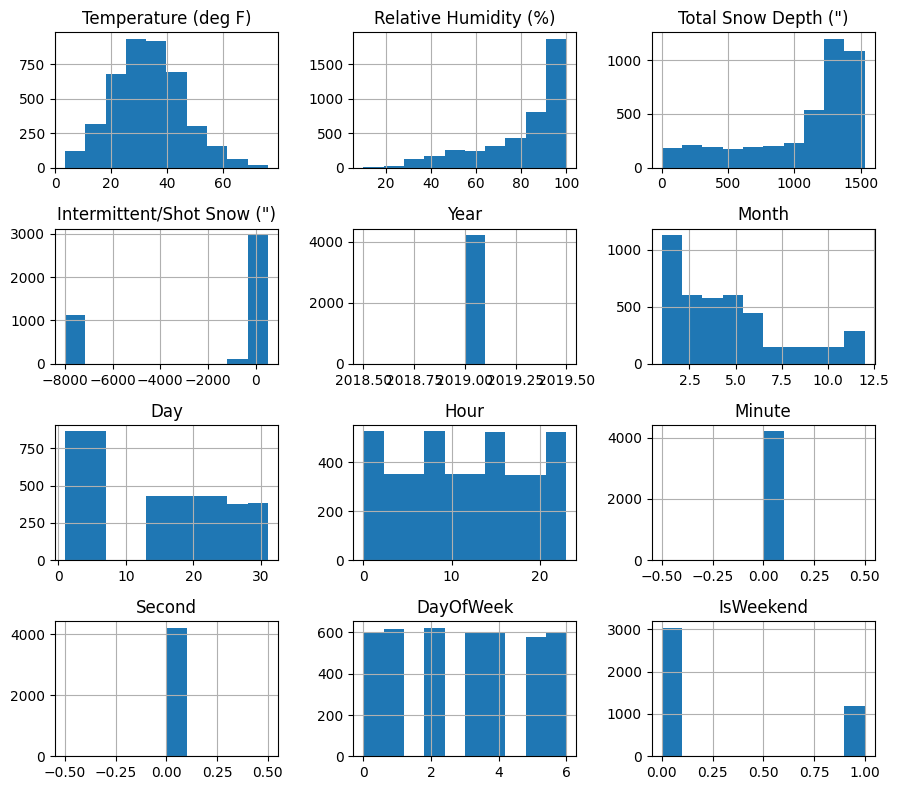

In [185]:
new_df.hist(figsize=(9 , 8))
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_30176\2897354370.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr() , annot=True , cmap='coolwarm')


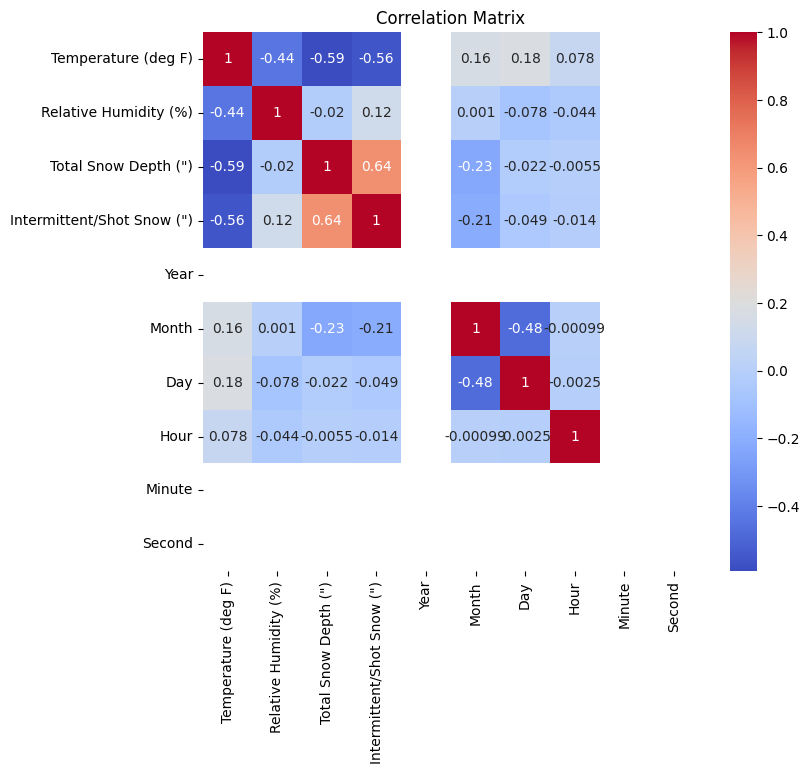

In [24]:
# correlation matrix

plt.figure(figsize=(8,7))
sns.heatmap(new_df.corr() , annot=True , cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

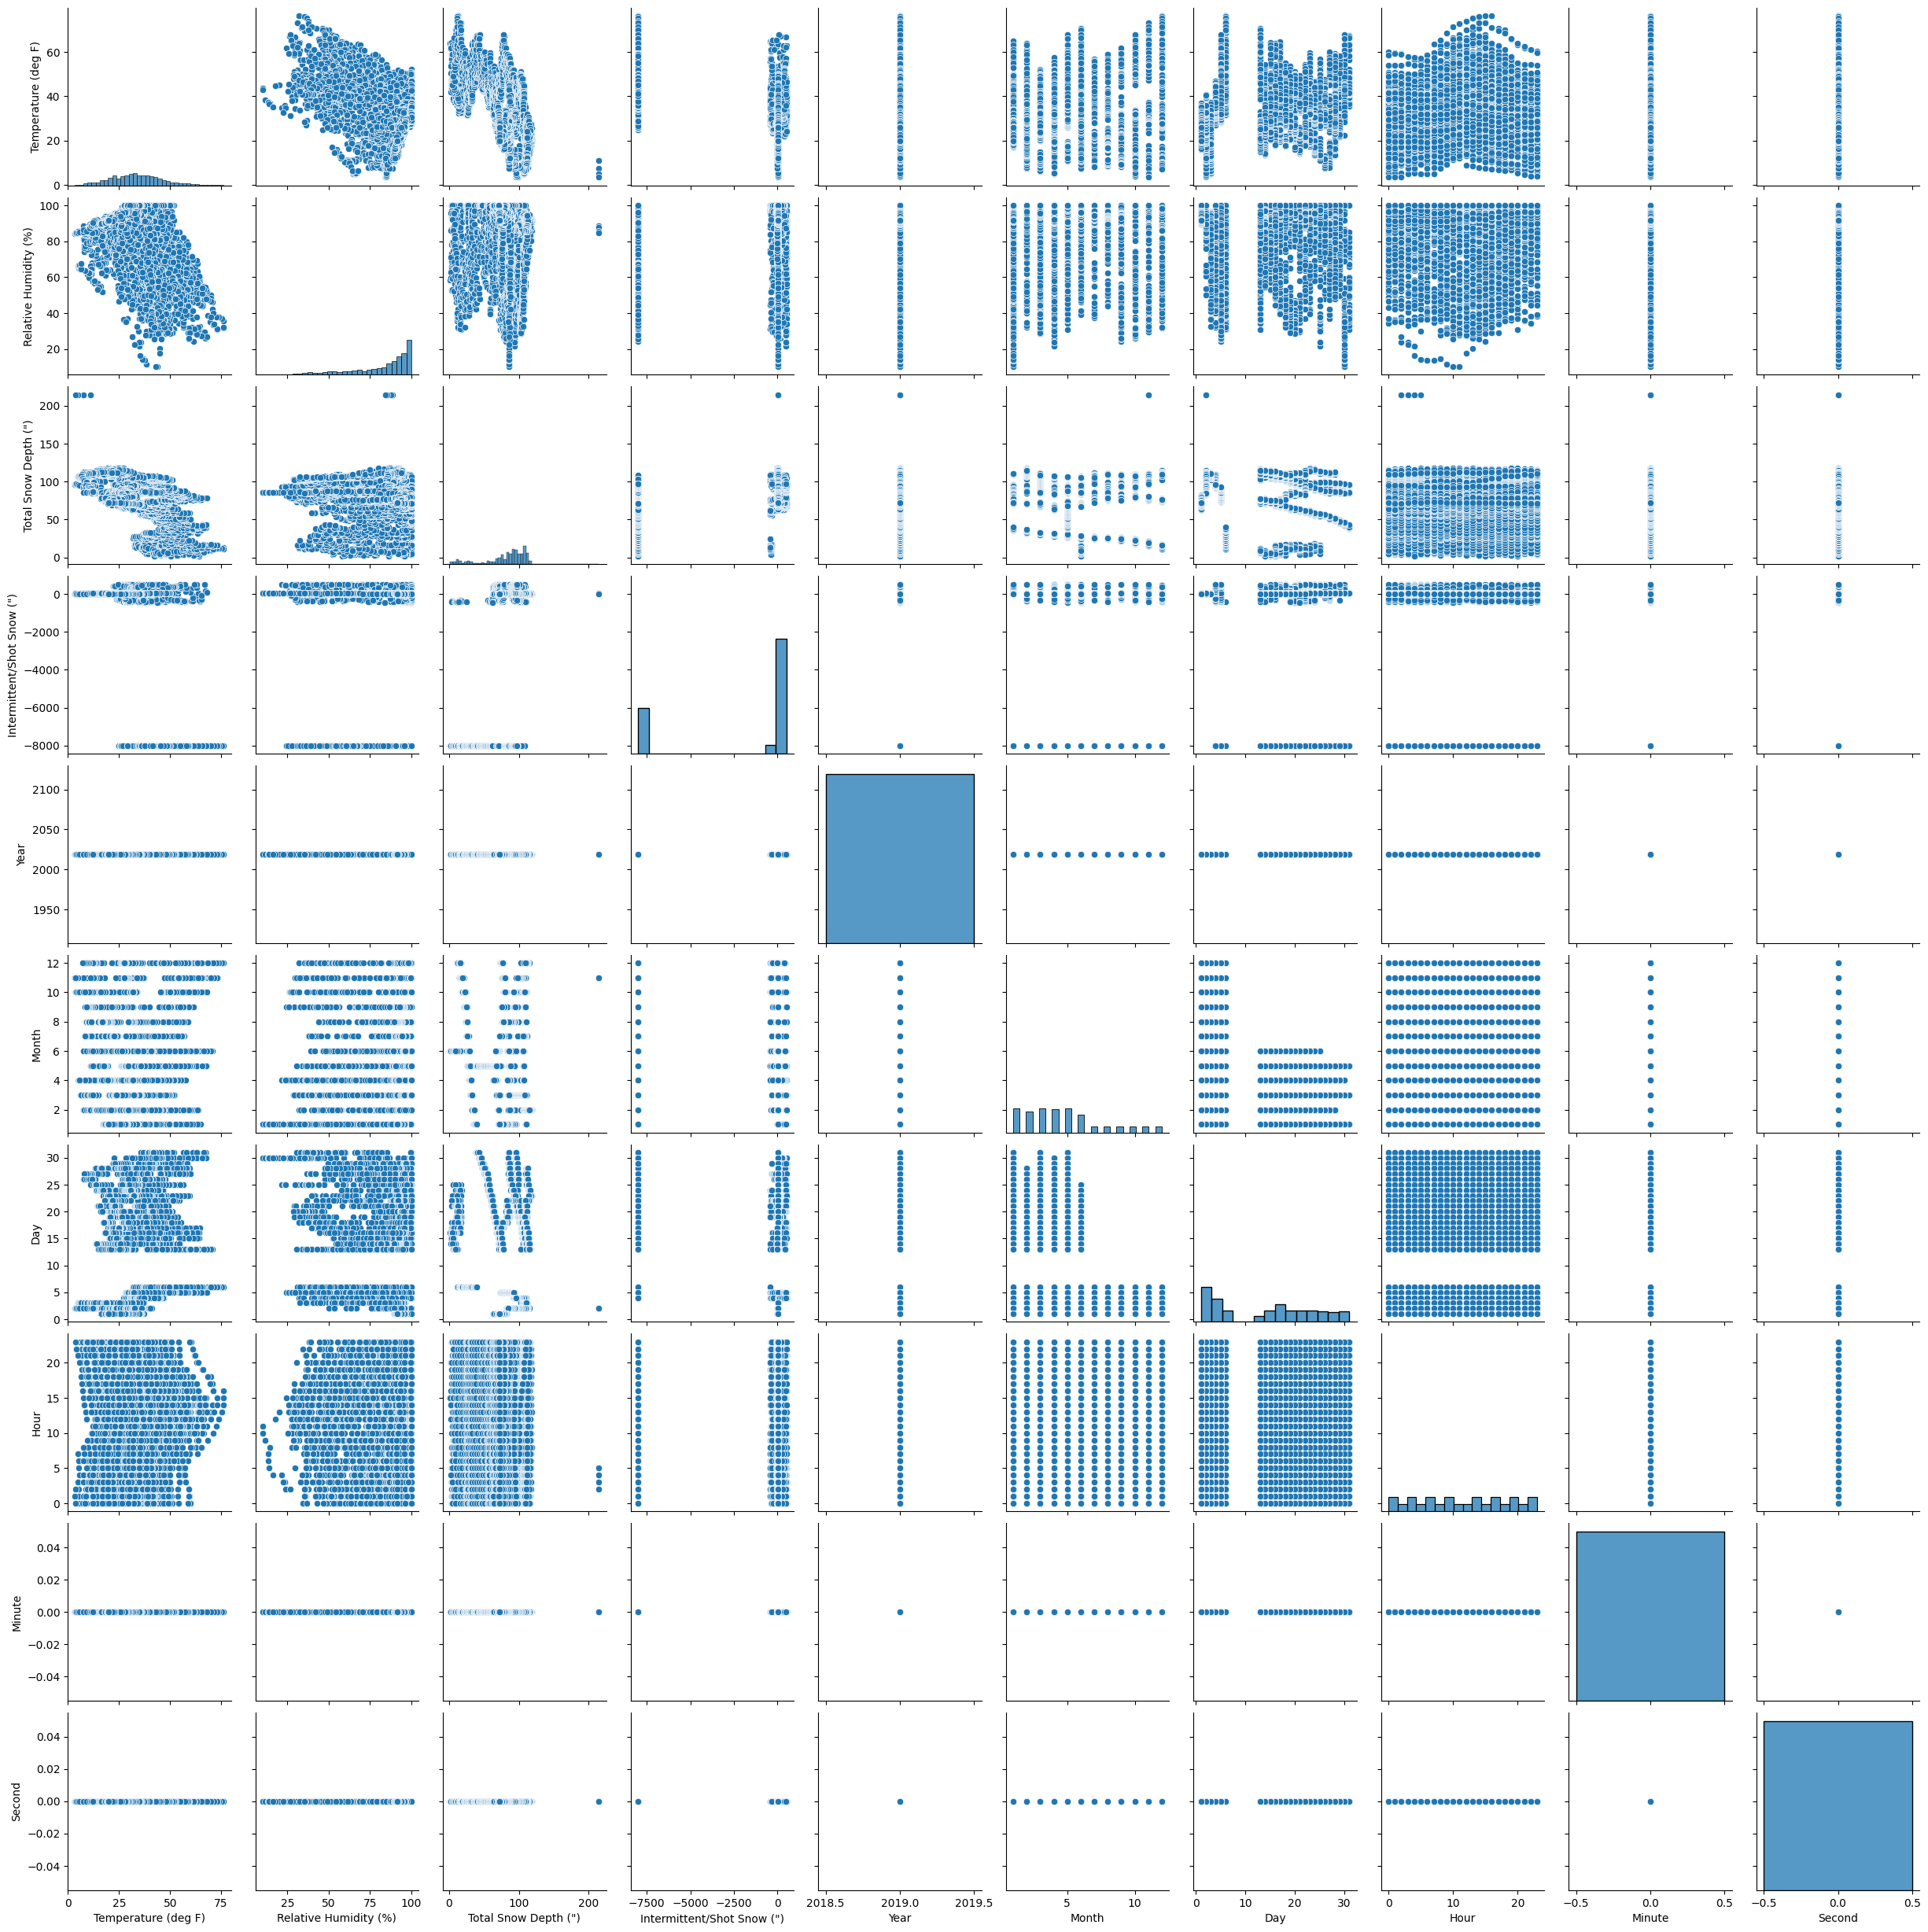

In [25]:
# Pair Plot For NUmerical Features


sns.pairplot(new_df)
plt.show()

In [45]:
new_df['DayOfWeek'] = pd.to_datetime(new_df['Date']).dt.dayofweek
new_df['IsWeekend'] = new_df['DayOfWeek'].apply(lambda x: 1 if x >=5 else 0)

In [46]:
# Example of categorizing seasons (assuming Northern Hemisphere)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [47]:
new_df['Season'] = new_df['Month'].apply(get_season)

In [48]:
new_df.head(3)

,Temperature (deg F),Relative Humidity (%),"Total Snow Depth ("")","Intermittent/Shot Snow ("")",Date,Time,Year,Month,Day,Hour,Minute,Second,DayOfWeek,IsWeekend,Season
0,47.33,89.90,16.46,-7999.0,2019-06-25,15:00:00,2019,6,25,15,0,0,1,0,Summer
1,53.80,69.82,10.02,-7999.0,2019-06-25,14:00:00,2019,6,25,14,0,0,1,0,Summer
2,55.02,65.32,12.31,-7999.0,2019-06-25,13:00:00,2019,6,25,13,0,0,1,0,Summer


In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.pipeline import Pipeline

In [186]:
target_column = 'Total Snow Depth (")'
x = new_df.drop(target_column , axis=1)
y =new_df[target_column]

In [187]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2 , random_state=42)

In [188]:
 # Identify numerical and categorical columns
num_cols = x.select_dtypes(include=['int64', 'float64']).columns
cat_cols = x.select_dtypes(include=['object']).columns

In [189]:
# Preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore' , sparse_output=False), cat_cols)
    ])

In [190]:
# Create and fit the preprocessing pipeline
X_train = preprocessor.fit_transform(x_train)
X_test = preprocessor.transform(x_test)

In [191]:
# # Convert the preprocessed data back to DataFrame for better visualization
# X_train = pd.DataFrame(X_train)
# X_test = pd.DataFrame(X_test)


X_train[:5]

array([[-0.59475614,  0.75268322,  0.57221901, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.11861399,  0.94699202,  0.70357503, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.34431358, -0.90209249,  0.67377915, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.5150208 ,  0.61089032, -1.69000785, ...,  1.        ,
         0.        ,  0.        ],
       [-1.49781788,  0.39557517,  0.57145363, ...,  0.        ,
         1.        ,  0.        ]])

In [192]:
from sklearn.metrics import classification_report, confusion_matrix


In [193]:
lor = LogisticRegression()

lor.fit(X_train, y_train)

LogisticRegression()

In [195]:
lor.score(X_train, y_train)*100

44.810201660735466

In [196]:
lor.score(X_test, y_test)*100

7.2274881516587675

In [197]:
y_pred = lor.predict(X_test)

In [198]:
from sklearn.model_selection import GridSearchCV

In [199]:
lor = LogisticRegression()

# Hyper Parameter Tuining 

In [200]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solver algorithms
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

In [201]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lor, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [97]:
# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

Best Parameters: {'C': 1, 'max_iter': 100, 'solver': 'saga'}
Best Cross-Validation Score: 1.0


In [98]:
# Use the best estimator to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
# second Accuracy 

In [99]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
rfc.score(X_train, y_train)*100

100.0

In [102]:
rfc.score(X_test, y_test)*100

100.0

In [104]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)


DecisionTreeClassifier()

In [106]:
dtc.score(X_train, y_train)*100

100.0

In [107]:
dtc.score(X_test, y_test)*100

100.0

In [109]:
from sklearn.svm import SVC

In [110]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [111]:
svm.score(X_train, y_train)*100

100.0

In [112]:
svm.score(X_test, y_test)*100

100.0

In [113]:
# logistic regression model after Hyper parameter tuining

In [115]:
lor.fit(X_train, y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
lor.score(X_train, y_train)*100

100.0

In [117]:
lor.score(X_test, y_test)*100

100.0

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report , confusion_matrix

In [123]:
gb_model = GradientBoostingClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

In [124]:
# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [125]:
# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

In [126]:
# Perform grid search with cross-validation for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [137]:
# Perform grid search with cross-validation for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [138]:
# Print the best parameters and the corresponding scores
print("Random Forest Best Parameters: ", rf_grid_search.best_params_)
print("Random Forest Best Cross-Validation Score: ", rf_grid_search.best_score_)

Random Forest Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Best Cross-Validation Score:  1.0


In [139]:
print("Gradient Boosting Best Parameters: ", gb_grid_search.best_params_)
print("Gradient Boosting Best Cross-Validation Score: ", gb_grid_search.best_score_)


Gradient Boosting Best Parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Gradient Boosting Best Cross-Validation Score:  1.0


In [140]:
# Use the best estimators to make predictions on the test set
best_rf_model = rf_grid_search.best_estimator_
best_gb_model = gb_grid_search.best_estimator_

In [141]:
y_rf_pred = best_rf_model.predict(X_test)
y_gb_pred = best_gb_model.predict(X_test)


In [142]:
# Evaluate the models
print("Random Forest Evaluation")
print(confusion_matrix(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))

Random Forest Evaluation
[[ 87   0   0   0]
 [  0 349   0   0]
 [  0   0 168   0]
 [  0   0   0 240]]
              precision    recall  f1-score   support

        Fall       1.00      1.00      1.00        87
      Spring       1.00      1.00      1.00       349
      Summer       1.00      1.00      1.00       168
      Winter       1.00      1.00      1.00       240

    accuracy                           1.00       844
   macro avg       1.00      1.00      1.00       844
weighted avg       1.00      1.00      1.00       844



In [143]:
print("Gradient Boosting Evaluation")
print(confusion_matrix(y_test, y_gb_pred))
print(classification_report(y_test, y_gb_pred))

Gradient Boosting Evaluation
[[ 87   0   0   0]
 [  0 349   0   0]
 [  0   0 168   0]
 [  0   0   0 240]]
              precision    recall  f1-score   support

        Fall       1.00      1.00      1.00        87
      Spring       1.00      1.00      1.00       349
      Summer       1.00      1.00      1.00       168
      Winter       1.00      1.00      1.00       240

    accuracy                           1.00       844
   macro avg       1.00      1.00      1.00       844
weighted avg       1.00      1.00      1.00       844



In [144]:
# Define the logistic regression model with regularization
log_reg_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)


In [145]:
# Fit the model to the training data
log_reg_model.fit(X_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

In [146]:
# Make predictions on the test data
y_log_reg_pred = log_reg_model.predict(X_test)


In [147]:
log_reg_model.score(X_train, y_train)*100

100.0

In [148]:
log_reg_model.score(X_test, y_test)*100

100.0

In [150]:
# Evaluate the model
print("Logistic Regression Evaluation")
print(confusion_matrix(y_test, y_log_reg_pred))
print(classification_report(y_test, y_log_reg_pred))

Logistic Regression Evaluation
[[ 87   0   0   0]
 [  0 349   0   0]
 [  0   0 168   0]
 [  0   0   0 240]]
              precision    recall  f1-score   support

        Fall       1.00      1.00      1.00        87
      Spring       1.00      1.00      1.00       349
      Summer       1.00      1.00      1.00       168
      Winter       1.00      1.00      1.00       240

    accuracy                           1.00       844
   macro avg       1.00      1.00      1.00       844
weighted avg       1.00      1.00      1.00       844



In [151]:
from sklearn.ensemble import VotingClassifier


In [152]:
# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_rf_model),
        ('gb', best_gb_model),
        ('log_reg', log_reg_model)
    ],
    voting='hard'
)


In [153]:
# Fit the voting classifier
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         random_state=42,
                                                         subsample=0.8)),
                             ('log_reg',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear'))])

In [154]:
# Make predictions on the test data
y_voting_pred = voting_clf.predict(X_test)

In [155]:
# Evaluate the voting classifier
print("Voting Classifier Evaluation")
print(confusion_matrix(y_test, y_voting_pred))
print(classification_report(y_test, y_voting_pred))

Voting Classifier Evaluation
[[ 87   0   0   0]
 [  0 349   0   0]
 [  0   0 168   0]
 [  0   0   0 240]]
              precision    recall  f1-score   support

        Fall       1.00      1.00      1.00        87
      Spring       1.00      1.00      1.00       349
      Summer       1.00      1.00      1.00       168
      Winter       1.00      1.00      1.00       240

    accuracy                           1.00       844
   macro avg       1.00      1.00      1.00       844
weighted avg       1.00      1.00      1.00       844



In [130]:
# Evaluate the model
print("Logistic Regression Evaluation")
print(confusion_matrix(y_test, y_log_reg_pred))
print(classification_report(y_test, y_log_reg_pred))

Logistic Regression Evaluation
[[ 87   0   0   0]
 [  0 349   0   0]
 [  0   0 168   0]
 [  0   0   0 240]]
              precision    recall  f1-score   support

        Fall       1.00      1.00      1.00        87
      Spring       1.00      1.00      1.00       349
      Summer       1.00      1.00      1.00       168
      Winter       1.00      1.00      1.00       240

    accuracy                           1.00       844
   macro avg       1.00      1.00      1.00       844
weighted avg       1.00      1.00      1.00       844



In [85]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 87   0   0   0]
 [  0 349   0   0]
 [  0   0 168   0]
 [  0   0   0 240]]
              precision    recall  f1-score   support

        Fall       1.00      1.00      1.00        87
      Spring       1.00      1.00      1.00       349
      Summer       1.00      1.00      1.00       168
      Winter       1.00      1.00      1.00       240

    accuracy                           1.00       844
   macro avg       1.00      1.00      1.00       844
weighted avg       1.00      1.00      1.00       844

